# Colab code

In [1]:
if 'google.colab' in str(get_ipython()):
  # connect to the datasets
  !apt install subversion
  !svn checkout https://github.com/sbettid/ATML_Project_202021
  eyes_dataset_path = "/content/ATML_Project_202021/trunk/BioID-FaceDatabase-V1.2/"
  xml_path = "/content/ATML_Project_202021/trunk/haarcascade_xml/"
else:
  eyes_dataset_path = "BioID-FaceDatabase-V1.2/"
  xml_path = "haarcascade_xml/"

Output streaming troncato alle ultime 5000 righe.
A    ATML_Project_202021/trunk/mrlEyes_2018_01/1/s0036_05434_1_1_1_0_0_01.png
A    ATML_Project_202021/trunk/mrlEyes_2018_01/1/s0036_05435_1_1_1_0_0_01.png
A    ATML_Project_202021/trunk/mrlEyes_2018_01/1/s0036_05436_1_1_1_0_0_01.png
A    ATML_Project_202021/trunk/mrlEyes_2018_01/1/s0036_05437_1_1_1_0_0_01.png
A    ATML_Project_202021/trunk/mrlEyes_2018_01/1/s0036_05438_1_1_1_0_0_01.png
A    ATML_Project_202021/trunk/mrlEyes_2018_01/1/s0036_05439_1_1_1_0_0_01.png
A    ATML_Project_202021/trunk/mrlEyes_2018_01/1/s0036_05440_1_1_1_0_0_01.png
A    ATML_Project_202021/trunk/mrlEyes_2018_01/1/s0036_05441_1_1_1_0_0_01.png
A    ATML_Project_202021/trunk/mrlEyes_2018_01/1/s0036_05442_1_1_1_0_0_01.png
A    ATML_Project_202021/trunk/mrlEyes_2018_01/1/s0036_05443_1_1_1_0_0_01.png
A    ATML_Project_202021/trunk/mrlEyes_2018_01/1/s0036_05444_1_1_1_0_0_01.png
A    ATML_Project_202021/trunk/mrlEyes_2018_01/1/s0036_05445_1_1_1_0_0_01.png
A    ATML_Proj

# Import required libraries

In [10]:
import numpy as np
import os
import cv2
import csv
from tensorflow import keras
#from google.colab.patches import cv2_imshow

# Eye-detection from images



In [4]:
face_cascade = cv2.CascadeClassifier(xml_path + "haarcascade_frontalface_alt.xml")
right_eye_cascade = cv2.CascadeClassifier(xml_path + "haarcascade_righteye_2splits.xml")
left_eye_cascade = cv2.CascadeClassifier(xml_path + "haarcascade_lefteye_2splits.xml")
#eyes_cascade = cv2.CascadeClassifier("/content/eye_glasses.xml")

In [31]:
from google.colab.patches import cv2_imshow

In [ ]:
1521

['232', '110', '161', '110']
[37 43 44 44]
Values: 233  and  80


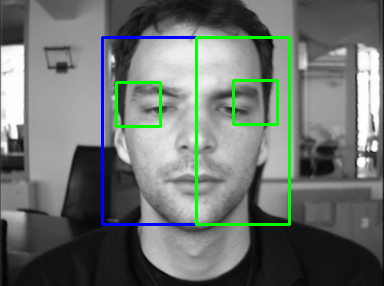

['223', '103', '154', '102']
[35 45 38 38]
Values: 224  and  78
Left OK


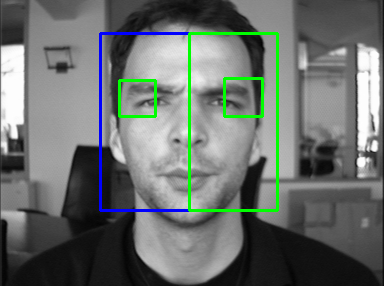

['213', '87', '144', '87']
[34 44 46 46]
Values: 213  and  59
Left OK


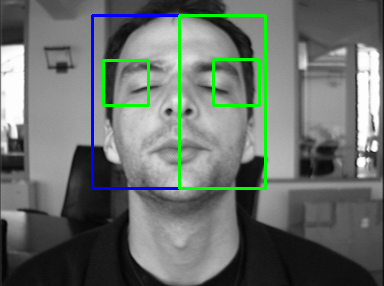

['216', '95', '147', '94']
[35 39 45 45]
Values: 217  and  63
Left OK


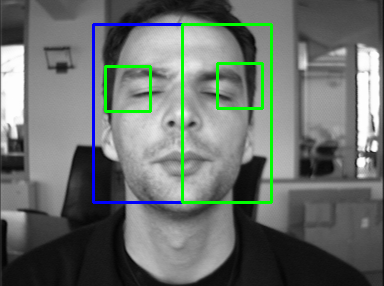

['223', '98', '151', '98']
[33 43 44 44]
Values: 220  and  71
Left OK
Right OK


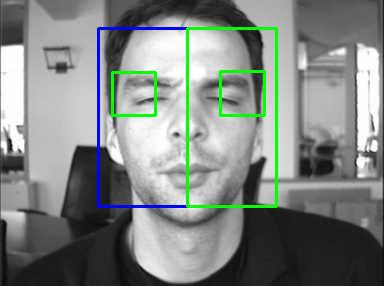

['222', '95', '151', '96']
[34 43 41 41]
Values: 219  and  70
Left OK
Right OK


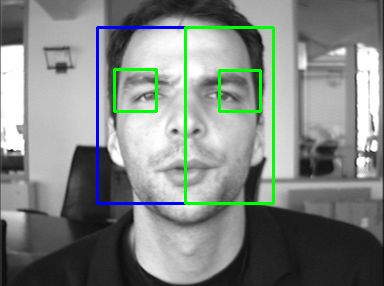

['231', '99', '159', '98']
[35 44 42 42]
Values: 231  and  71


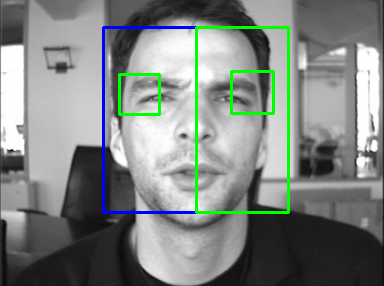

['224', '95', '146', '94']
[33 42 44 44]
Values: 218  and  66
Left OK
Right OK


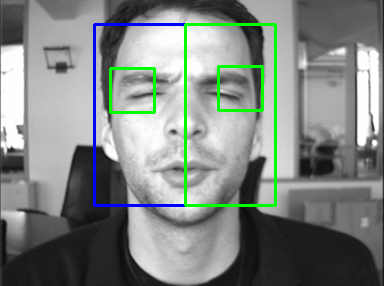

['223', '94', '149', '95']
[30 41 43 43]
Values: 215  and  68
Left OK
Right OK


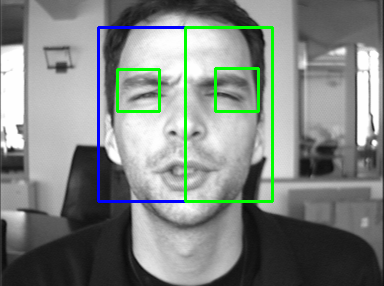

['226', '110', '147', '111']
[30 42 44 44]
Values: 217  and  82
Left OK
Right OK


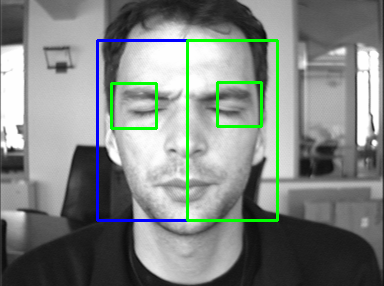

['238', '107', '160', '113']
[34 47 45 45]
Values: 235  and  85
Left OK
Right OK


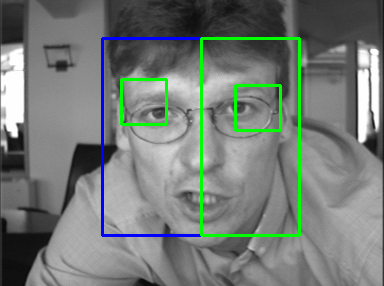

['225', '112', '145', '111']
[39 49 46 46]
Values: 223  and  81
Left OK
Right OK


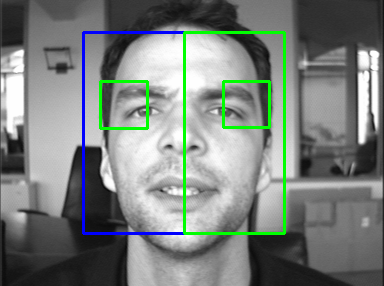

['213', '113', '134', '114']
[34 45 45 45]
Values: 207  and  85
Left OK
Right OK


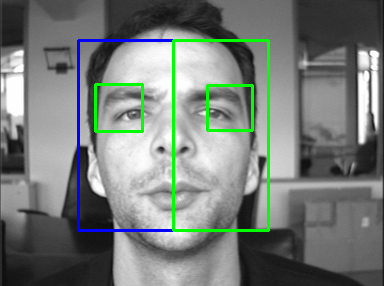

['219', '110', '132', '110']
[40 52 51 51]
Values: 218  and  76
Left OK
Right OK


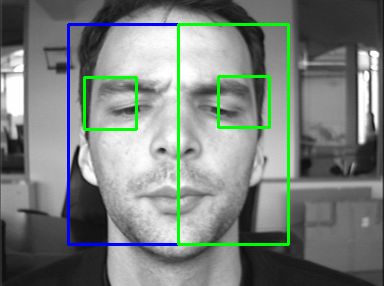

['230', '137', '133', '138']
[23 45 49 49]
Values: 207  and  108
Left OK
Right OK


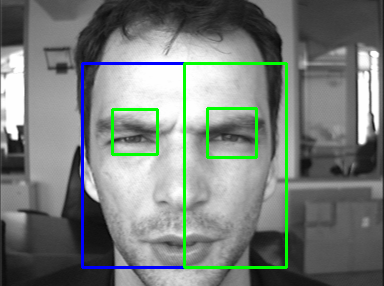

In [51]:
total_correct = 0

for imageNumb in range(15):
  
  if imageNumb < 10:
    imageNumb = "000" + str(imageNumb)
  elif imageNumb < 100:
    imageNumb = "00" + str(imageNumb)
  elif imageNumb < 1000:
    imageNumb = "0" + str(imageNumb)

  img = cv2.imread(eyes_dataset_path + "BioID_" + str(imageNumb) + ".pgm")
  
  labels = []

  with open(eyes_dataset_path + "BioID_" + str(imageNumb) + ".eye") as label_file:
    # skip first line
    next(label_file)
    #obtain labels
    labels_reader = csv.reader(label_file, delimiter='\t')
    labels = next(labels_reader)
  print(labels)
  if img is not None:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)


    for (x,y,w,h) in faces:
      #img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
      half_int = int(np.ceil(w/2))
      
      roi_gray_left = gray[y:y+h, x:x+half_int]
      roi_gray_right = gray[y:y+h, x+half_int:x+w]
      
      img = cv2.rectangle(img,(x,y),(x+half_int,y+h),(255,0,0),2) # left part
      img = cv2.rectangle(img,(x+half_int,y),(x+w,y+h),(0,255,0),2) # right part

      roi_color_left = img[y:y+h, x:x+half_int]
      roi_color_right = img[y:y+h, x+half_int:x+w]
      
      right_eyes = right_eye_cascade.detectMultiScale(roi_gray_left)
      left_eyes = left_eye_cascade.detectMultiScale(roi_gray_right)

      # check we have detected something on both sides
      if len(right_eyes) > 0 and len(left_eyes) > 0:
            (rx,ry,rw,rh) = right_eyes[0]
            (lx,ly,lw,lh) = left_eyes[0]

            # check the eye is in the boundary: first check the left eye, then the right one. They both need to be correct
            print(right_eyes[0])
            
            left_x = int(labels[0])
            left_y = int(labels[1])
            right_x = int(labels[2])
            right_y = int(labels[3])
            
            cv2.rectangle(roi_color_right,(rx,ry),(rx+rw,ry+rh),(0,255,0),2)
            cv2.rectangle(roi_color_left,(lx,ly),(lx+lw,ly+lh),(0,255,0),2)
            print("Values:", x + half_int + rx, " and ", y + ry)
            
            
            if x + lx < right_x < x + lx + lw and y + ly < right_y < y + ly + lh: #left is correct
              print("Left OK")
              if x + half_int + rx < left_x < x + rx + half_int + rw and y + ry < left_y < y + ry + rh:
                total_correct += 1
                print("Right OK")
            cv2_imshow(img)

In [52]:
print(total_correct)

10


# Old (code) but gold

In [ ]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [ ]:
for (x,y,w,h) in faces:
    #img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    half_int = int(np.ceil(w/2))
    
    roi_gray_left = gray[y:y+h, x:x+half_int]
    roi_gray_right = gray[y:y+h, x+half_int:x+w]
    
    img = cv2.rectangle(img,(x,y),(x+half_int,y+h),(255,0,0),2)
    img = cv2.rectangle(img,(x+half_int,y),(x+w,y+h),(0,255,0),2)

    roi_color_left = img[y:y+h, x:x+half_int]
    roi_color_right = img[y:y+h, x+half_int:x+w]
    
    right_eyes = right_eye_cascade.detectMultiScale(roi_gray_left)
    left_eyes = left_eye_cascade.detectMultiScale(roi_gray_right)

In [ ]:
right_eyes = right_eye_cascade.detectMultiScale(gray)
left_eyes = left_eye_cascade.detectMultiScale(gray)

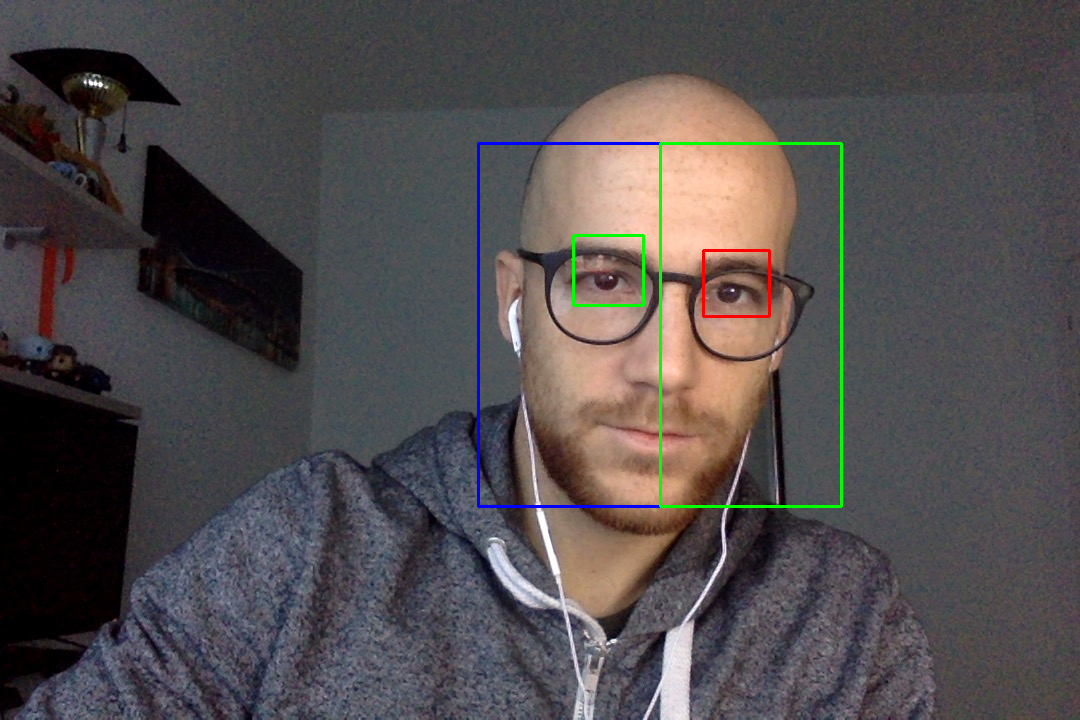

In [ ]:
for (ex,ey,ew,eh) in right_eyes:
        cv2.rectangle(roi_color_left,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


for (ex,ey,ew,eh) in left_eyes:
        cv2.rectangle(roi_color_right,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)

#(ex,ey,ew,eh) = left_eyes[0]
#cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## With video capture

In [ ]:
cap = cv2.VideoCapture(0)

In [ ]:
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    
    for (x,y,w,h) in faces:
        half_int = int(np.ceil(w/2))
    
        roi_gray_left = gray[y:y+h, x:x+half_int]
        roi_gray_right = gray[y:y+h, x+half_int:x+w]
    
        #img = cv2.rectangle(frame,(x,y),(x+half_int,y+h),(255,0,0),2)
        #img = cv2.rectangle(frame,(x+half_int,y),(x+w,y+h),(0,255,0),2)

        roi_color_left = frame[y:y+h, x:x+half_int]
        roi_color_right = frame[y:y+h, x+half_int:x+w]
    
        right_eyes = right_eye_cascade.detectMultiScale(roi_gray_left)
        left_eyes = left_eye_cascade.detectMultiScale(roi_gray_right)
        
        for (ex,ey,ew,eh) in right_eyes:
            cv2.rectangle(roi_color_left,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


        for (ex,ey,ew,eh) in left_eyes:
            cv2.rectangle(roi_color_right,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)
    
    # Display the resulting frame
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined